## 시간당 자전거 대여량 예측

In [37]:
import pandas as pd

## Load Dataset

In [38]:
train =  pd.read_csv('../3w/bike data/train.csv')

print(train.shape)
pd.read_csv('../3w/bike data/train.csv').head(2)

(10886, 12)


datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

In [39]:
train.shape

(10886, 12)

In [40]:
test = pd.read_csv('../3w/bike data/test.csv')

pd.read_csv('../3w/bike data/test.csv').head(2)
print(test.shape)

(6493, 9)


In [41]:
test.shape
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [42]:
test.shape ,  train.shape


# 데이트는 항상 print, shape, len등으로 꼭 (출력해서) 확인하기!

((6493, 9), (10886, 12))

## Preprocessing



### Parse datetime (문자열 빼고 숫자열로)

In [43]:
import pandas as pd

#### train

In [44]:
pd.to_datetime(train["datetime"])

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [45]:
train['datetime'] = pd.to_datetime(train["datetime"])

In [46]:
train['datetime-year'] = train["datetime"].dt.year
train['datetime-month'] = train["datetime"].dt.month
train['datetime-day'] = train["datetime"].dt.day
train['datetime-hour'] = train["datetime"].dt.hour
train['datetime-minute'] = train["datetime"].dt.minute
train['datetime-second'] = train["datetime"].dt.second



print(train.shape)
train.head()

(10886, 18)


datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  datetime-year  \
0        81        0.0       3          13     16           2011   
1        80        0.0       8          32     40           2011   
2        80        0.0       5          27     32           2011   
3        75        0.0       3          10     13           2011   
4        75        0.0       0           1      1           2011   

   datetime-month  datetime-day  datetime-hour  datetime-minute  \
0               1             1              0                0   
1               1             1              1                0   
2               1             1              2                0   
3               1             1              3                0   
4               1             1              4                0   

   datetime-second  
0                0  
1                0  
2                0  
3                0  
4                0

In [47]:
test['datetime'] = pd.to_datetime(train["datetime"])

In [48]:
test['datetime-year'] = test["datetime"].dt.year
test['datetime-month'] = test["datetime"].dt.month
test['datetime-day'] = test["datetime"].dt.day
test['datetime-hour'] = test["datetime"].dt.hour
test['datetime-minute'] = test["datetime"].dt.minute
test['datetime-second'] = test["datetime"].dt.second



print(test.shape)
test.head()

(6493, 15)


datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-01 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-01 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-01 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-01 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-01 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  datetime-year  datetime-month  datetime-day  \
0        56    26.0027           2011               1             1   
1        56     0.0000           2011               1             1   
2        56     0.0000           2011               1             1   
3        56    11.0014           2011               1             1   
4        56    11.0014           2011               1             1   

   datetime-hour  datetime-minute  datetime-second  
0              0                0                0  
1              1                0                0  
2              2                0                0  
3              3                0                0  
4              4                0                0

## Decision Making 확률 빠르게 높이기! 본격적인 데이터분석!

In [49]:
# 항상 쉬운 모델로 접근
# feature , lable로 쪼개서 분석 -> baseline

### Train

In [50]:
feature_names = ['season', 'holiday', 'workingday', 'weather', 
                 'temp','atemp', 'humidity',  'windspeed', 'datetime-year', 'datetime-month','datetime-day', 'datetime-hour',
                 'datetime-minute', 'datetime-second']

In [51]:
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-month',
 'datetime-day',
 'datetime-hour',
 'datetime-minute',
 'datetime-second']

In [52]:
X_train = train[feature_names]

In [53]:
print(X_train.shape)
X_train.head()

(10886, 14)


season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   datetime-year  datetime-month  datetime-day  datetime-hour  \
0           2011               1             1              0   
1           2011               1             1              1   
2           2011               1             1              2   
3           2011               1             1              3   
4           2011               1             1              4   

   datetime-minute  datetime-second  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0

In [54]:
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-month',
 'datetime-day',
 'datetime-hour',
 'datetime-minute',
 'datetime-second']

In [55]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 14)


season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   
2       1        0           1        1  10.66  13.635        56     0.0000   
3       1        0           1        1  10.66  12.880        56    11.0014   
4       1        0           1        1  10.66  12.880        56    11.0014   

   datetime-year  datetime-month  datetime-day  datetime-hour  \
0           2011               1             1              0   
1           2011               1             1              1   
2           2011               1             1              2   
3           2011               1             1              3   
4           2011               1             1              4   

   datetime-minute  datetime-second  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0

In [56]:
label_name = 'count'

y_train = train[label_name]

print(y_train.shape)
y_train .head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

## Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=37)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

In [58]:
model.fit(X_train, y_train)

/Users/monica_mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

In [180]:
prediction = model.predict(X_test)

print(prediction.shape)
prediction

(6493,)


array([  5.7,   6. ,   2.7, ..., 194.7, 325.8, 324.7])

In [181]:
pd.read_csv('../3w/bike data/sampleSubmission.csv')

datetime  count
0     2011-01-20 00:00:00      0
1     2011-01-20 01:00:00      0
2     2011-01-20 02:00:00      0
3     2011-01-20 03:00:00      0
4     2011-01-20 04:00:00      0
...                   ...    ...
6488  2012-12-31 19:00:00      0
6489  2012-12-31 20:00:00      0
6490  2012-12-31 21:00:00      0
6491  2012-12-31 22:00:00      0
6492  2012-12-31 23:00:00      0

[6493 rows x 2 columns]

In [182]:
submit = pd.read_csv('../3w/bike data/sampleSubmission.csv')

submit["count"] = prediction

print(submit.shape)
submit.head()

submit.to_csv('RandomForest.csv', index=False)

(6493, 2)


# 다시다시

In [198]:
print(test.shape)
print(train.shape)

(6493, 15)
(10886, 18)


In [200]:
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-01 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-01 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-01 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-01 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-01 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  datetime-year  datetime-month  datetime-day  \
0        56    26.0027           2011               1             1   
1        56     0.0000           2011               1             1   
2        56     0.0000           2011               1             1   
3        56    11.0014           2011               1             1   
4        56    11.0014           2011               1             1   

   datetime-hour  datetime-minute  datetime-second  
0              0                0                0  
1              1                0                0  
2              2                0                0  
3              3                0                0  
4              4                0                0

In [202]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  datetime-year  \
0        81        0.0       3          13     16           2011   
1        80        0.0       8          32     40           2011   
2        80        0.0       5          27     32           2011   
3        75        0.0       3          10     13           2011   
4        75        0.0       0           1      1           2011   

   datetime-month  datetime-day  datetime-hour  datetime-minute  \
0               1             1              0                0   
1               1             1              1                0   
2               1             1              2                0   
3               1             1              3                0   
4               1             1              4                0   

   datetime-second  
0                0  
1                0  
2                0  
3                0  
4                0

In [228]:
train.to_csv('trainweather.csv')

In [203]:
import pandas as pd

In [205]:
import seaborn as sns

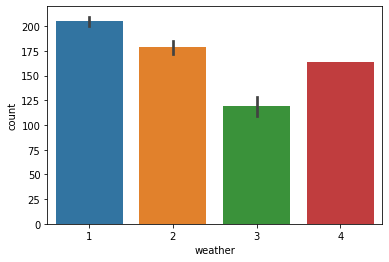

In [206]:
sns.barplot(data=train, x="weather", y='count')

In [207]:
import pandas as pd

## Preprocessing

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [23]:
label_encoder = enc.fit(train["weather"])
print("Categorical classess", label_encoder.classes_)

Categorical classess [1 2 3 4]


In [219]:
label_encoder.transformation(X_train[:,4])

AttributeError: 'LabelEncoder' object has no attribute 'transformation'

## pandas로 더미만들기(검색)

In [225]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import matplotlib.ticker as plticker  



In [226]:
from sklearn.datasets import iris
iris = load_iris()

/Users/monica_mac/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


ImportError: cannot import name 'iris' from 'sklearn.datasets' (/Users/monica_mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/datasets/__init__.py)

In [ ]:
target = iris['target']


In [25]:
['weather']

NameError: name 'feature' is not defined

In [26]:
import pandas as pd

In [ ]:
df=pd.DataFrame()

In [35]:
train['Spring'] = \
train['weather'].replace('Spring, 1')


In [36]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  datetime-year  \
0        81        0.0       3          13     16           2011   
1        80        0.0       8          32     40           2011   
2        80        0.0       5          27     32           2011   
3        75        0.0       3          10     13           2011   
4        75        0.0       0           1      1           2011   

   datetime-month  datetime-day  datetime-hour  datetime-minute  \
0               1             1              0                0   
1               1             1              1                0   
2               1             1              2                0   
3               1             1              3                0   
4               1             1              4                0   

   datetime-second  (Spring, Summer, Fall, Winter)  Spring  
0                0                               1       1  
1                0                               1       1  
2                0                               1       1  
3                0                               1       1  
4                0                               1       1

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  datetime-year  \
0        81        0.0       3          13     16           2011   
1        80        0.0       8          32     40           2011   
2        80        0.0       5          27     32           2011   
3        75        0.0       3          10     13           2011   
4        75        0.0       0           1      1           2011   

   datetime-month  datetime-day  datetime-hour  datetime-minute  \
0               1             1              0                0   
1               1             1              1                0   
2               1             1              2                0   
3               1             1              3                0   
4               1             1              4                0   

   datetime-second  (Spring, Summer, Fall, Winter)  
0                0                               1  
1                0                               1  
2                0                               1  
3                0                               1  
4                0                               1

#  One Hot Encoding

In [63]:
X_train.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   datetime-year  datetime-month  datetime-day  datetime-hour  \
0           2011               1             1              0   
1           2011               1             1              1   
2           2011               1             1              2   
3           2011               1             1              3   
4           2011               1             1              4   

   datetime-minute  datetime-second  Spring  
0                0                0       1  
1                0                0       1  
2                0                0       1  
3                0                0       1  
4                0                0       1

In [62]:
X_train['Spring'] = \
X_train['weather'].replace('Spring, 1')

/Users/monica_mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
X_train['Summer'] = \
X_train['weather'].replace('Summer, 2')

/Users/monica_mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
X_train['Fall'] = \
X_train['weather'].replace('Fall, 3')

/Users/monica_mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
X_train['Fall'] = \
X_train['weather'].replace('Winter, 4')

/Users/monica_mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
X_test['Spring'] = \
X_test['weather'].replace('Spring, 1')

In [77]:
X_test['Summer'] = \
X_test['weather'].replace('Summer, 2')

In [78]:
X_test['Fall'] = \
X_test['weather'].replace('Fall, 3')

In [79]:
X_test.head()

season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   
2       1        0           1        1  10.66  13.635        56     0.0000   
3       1        0           1        1  10.66  12.880        56    11.0014   
4       1        0           1        1  10.66  12.880        56    11.0014   

   datetime-year  datetime-month  datetime-day  datetime-hour  \
0           2011               1             1              0   
1           2011               1             1              1   
2           2011               1             1              2   
3           2011               1             1              3   
4           2011               1             1              4   

   datetime-minute  datetime-second  Spring  Summer  Fall  
0                0                0       1       1     1  
1                0                0       1       1     1  
2                0                0       1       1     1  
3                0                0       1       1     1  
4                0                0       1       1     1

In [69]:
X_train.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   datetime-year  datetime-month  datetime-day  datetime-hour  \
0           2011               1             1              0   
1           2011               1             1              1   
2           2011               1             1              2   
3           2011               1             1              3   
4           2011               1             1              4   

   datetime-minute  datetime-second  Spring  Summer  Fall  
0                0                0       1       1     1  
1                0                0       1       1     1  
2                0                0       1       1     1  
3                0                0       1       1     1  
4                0                0       1       1     1

In [80]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=37)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

In [81]:
model.fit(X_train, y_train)

/Users/monica_mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

In [83]:
model.fit(X_train, y_train)

prediction = model.predict(X_test)

In [84]:
prediction = model.predict(X_test)

print(prediction.shape)
prediction

(6493,)


array([  6. ,   8.7,   4.1, ..., 196.1, 388.3, 373.4])

In [86]:
pd.read_csv('../3w/bike data/sampleSubmission.csv')

datetime  count
0     2011-01-20 00:00:00      0
1     2011-01-20 01:00:00      0
2     2011-01-20 02:00:00      0
3     2011-01-20 03:00:00      0
4     2011-01-20 04:00:00      0
...                   ...    ...
6488  2012-12-31 19:00:00      0
6489  2012-12-31 20:00:00      0
6490  2012-12-31 21:00:00      0
6491  2012-12-31 22:00:00      0
6492  2012-12-31 23:00:00      0

[6493 rows x 2 columns]

In [88]:
submit = pd.read_csv('../3w/bike data/sampleSubmission.csv')

submit["count"] = prediction

print(submit.shape)
submit.head()

submit.to_csv('RandomForestweather.csv', index=False)

(6493, 2)
